# EDSA 2201 & 2207 classification hackathon 


© Explore Data Science Academy

---
### Honour Code

I {**Elelwani Tshikovhi**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Hackathon Overview: South African Language Identification Hack 2022

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media" width=80%/>

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

### Problem Statement

you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in using various classification models.

### Data overview
The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.
File descriptions

- train_set.csv - the training set
- test_set.csv - the test set
- sample_submission.csv - a sample submission file in the correct format

Language IDs

- afr - Afrikaans
- eng - English
- nbl - isiNdebele
- nso - Sepedi
- sot - Sesotho
- ssw - siSwati
- tsn - Setswana
- tso - Xitsonga
- ven - Tshivenda
- xho - isiXhosa
- zul - isiZulu

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Engineering</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
|  |

---

In [34]:
%pip install advertools

In [35]:
# Data analysis and wrangling libraries
import pandas as pd
import numpy as np
# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
# Preprocessing
import string
import re
import nltk
from nltk.corpus import stopwords
import time
import collections
from collections import Counter

# Modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
import advertools as adv

# Metrics for Model Evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import  log_loss
import time
# Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Libraries to Save/Restore Models
import pickle
# Downloads
nltk.download(['punkt','stopwords'])
%matplotlib inline
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\f5468981\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\f5468981\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
%pip install catboost

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |

---

In [37]:
# Load train data
train = pd.read_csv('train_set.csv')

# Load test data
test = pd.read_csv('test_set.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
|This phase is important. This will help to understand patterns in the data, pinpoint any outliers and indicate relationships between variables using  descriptive statistics and data visualisations

---

In [38]:
# to view the first 10 rows of the train data
train.head(10)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [39]:
# to view the first 10 rows of the test data
test.head(10)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [40]:
# view the info for both data set.
print(f'information of TRAIN dataset: {train.info()}')
print(f'informationof TEST dataaet: {test.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB
information of TRAIN dataset: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB
informationof TEST dataaet: None


- Train data has two categorical colums and test data has 1 categorical data 
- No missing values for both datasets

In [41]:
test.shape

(5682, 2)

In [42]:
print(train.shape)

(33000, 2)


### Further exploratory of data

In [43]:
train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [44]:
test.isnull().sum()

index    0
text     0
dtype: int64

insight  = `No Missing Values in the Datasets`

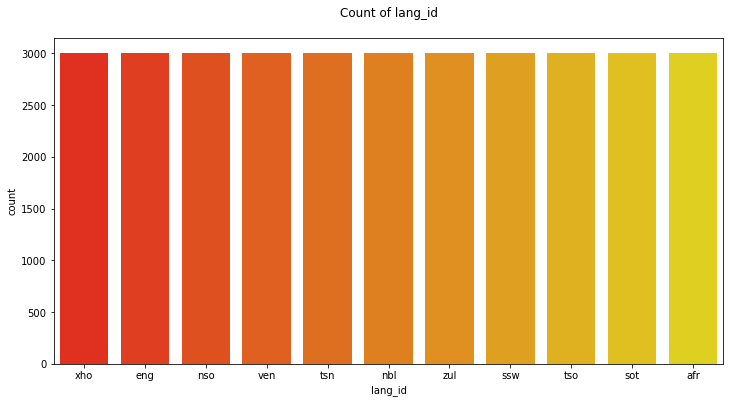

In [45]:
# Distributin of each language 
plt.figure(figsize=(12,6))
sns.countplot(x='lang_id',data=train, palette="autumn")
plt.title('Count of lang_id\n')
plt.show()

In [46]:
# count of observations per lan_id
train.lang_id.value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

unique Language IDs

- afr - Afrikaans
- eng - English
- nbl - isiNdebele
- nso - Sepedi
- sot - Sesotho
- ssw - siSwati
- tsn - Setswana
- tso - Xitsonga
- ven - Tshivenda
- xho - isiXhosa
- zul - isiZulu

<a id="four"></a>
## 4. Data cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
|  clean the dataset, and possibly create new features -using Natural language process . |

In [47]:
df = train.copy()
df.columns

Index(['lang_id', 'text'], dtype='object')

# 4.1 Cleaning the data 
Removing the noise in the data sets  such as punctuation and numbers  making the data more clean 

Cleaning the train data

In [48]:
## data cleaning for train data
# Make lower case
print ('Lowering case...')
df['text'] = df['text'].str.lower()
#removing tags 
print('removing htmltags...')
to_remove = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});''<.*?>')
#to_remove =re.compile('<.*?>')
#function to remove the tags
def cleantags(lang):
  cleanlang = re.sub(to_remove, '', lang)
  return cleanlang
df['text'] = df['text'].apply(cleantags)

#Remove punctuation
import string
print ('Cleaning punctuation...')
def remove_punctuation_numbers(lang):
  punc_numbers = string.punctuation + '0123456789'
  return ''.join([l for l in lang if l not in punc_numbers])
df['text'] = df['text'].apply(remove_punctuation_numbers)

#removing newline space
print("removing space ...")
def cleantext(text):
  text =re.sub("\n"," ",text)
  return text
df['text'] = df['text'].apply(cleantext)

df.head(10)

Lowering case...
removing htmltags...
Cleaning punctuation...
removing space ...


,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [49]:
#placing some short words
df['text'] =df['text'].str.replace(".txt","")

C:\Users\f5468981\AppData\Local\Temp/ipykernel_21764/4182000962.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] =df['text'].str.replace(".txt","")


In [50]:
# removing short words from train data
df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))


0        umgaqosiseko wenza amalungiselelo kumaziko axh...
1        idha iya kuba nobulumko bokubeka umsebenzi nap...
2        the province of kwazulunatal department of tra...
3        netefatša gore ba file dilo ka moka tše le dum...
4        khomishini ya ndinganyiso ya mbeu yo ewa maana...
                               ...                        
32995    popo ya dipolateforomo tse ke go tlisa boetele...
32996    modise mosadi na ntse sa utlwe hore thabang ra...
32997    closing date for the submission of completed t...
32998    nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999    mafapha mang le ona lokela ho etsa ditlaleho t...
Name: text, Length: 33000, dtype: object

# Cleaning the test data

In [51]:
#test data before being cleaned
test.head(10)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [52]:
df_test = test.copy()

In [53]:
# data cleaning for train data
# Make lower case
print ('Lowering case...')
df_test['text'] = df_test['text'].str.lower()
#removing tags 
to_remove = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});''<.*?>')
#to_remove =re.compile('<.*?>')
#function to remove the tags
print("removing tags...")
def cleantags(lang):
  cleanlang = re.sub(to_remove, '', lang)
  return cleanlang
df_test['text'] = df_test['text'].apply(cleantags)

#Remove punctuation
import string
print ('Cleaning punctuation...')
def remove_punctuation_numbers(lang):
  punc_numbers = string.punctuation + '0123456789'
  return ''.join([l for l in lang if l not in punc_numbers])
df_test['text'] =df_test['text'].apply(remove_punctuation_numbers)

#removing newline space
print("removing space ...")
def cleantext(text):
  text =re.sub("\n"," ",text)
  return text
df_test['text'] = df_test['text'].apply(cleantext)


df_test.head(10)

Lowering case...
removing tags...
Cleaning punctuation...
removing space ...


,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta
5,6,ke feela dilense tše hlakilego tša pono e tee ...
6,7,am final gems birthing optionszulutxt
7,8,ntjhafatso ya konteraka ya mosebetsi etsa bonn...
8,9,ugems uhlinzeka ngezinzuzo zemithi yezifo ezin...
9,10,so on occasion are statistics misused


In [54]:
#placing some short words
df_test['text'] =df_test['text'].str.replace(".txt",'')

C:\Users\f5468981\AppData\Local\Temp/ipykernel_21764/2704908093.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['text'] =df_test['text'].str.replace(".txt",'')


In [55]:
# removing short words from train data
df_test['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))


0       mmasepala fa maemo kgethegileng letlelela kgat...
1       uzakwaziswa ngokufaneleko nakungafuneka eminye...
2               tshivhumbeo tshi fana na ngano dza vhathu
3       kube inja nelikati betingevakala kutsi titsini...
4                            winste op buitelandse valuta
                              ...                        
5677                      you mark your ballot in private
5678    ge ka kgetha ka bowena go se šomiše mofani ka ...
5679    ka kopo etsa kgetho ya hao ka hloko hobane ha ...
5680    tb ke bokudi ba pmb mme morero tla lefella tlh...
5681                  vakatjhela iwebhusayidi yethu kuwww
Name: text, Length: 5682, dtype: object

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, create one or more regression models that are able to accurately predict the Sentiment. |

---

In [56]:
# selecting the features and the target
x = df['text']
y = df['lang_id']

# two vectoriser to use  which one to chose
#cv = CountVectorizer()
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(x)
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=42)

# Building Classifiers

In [57]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.linear_model import RidgeClassifier

In [59]:
names = ['Logistic Regression', 'Nearest Neighbors','MultinomialNB',
         'SGDClassifier','ComplementNB', 'Random Forest', 'Ridge']

In [60]:
classifiers = [
    LogisticRegression(C=1000,
            max_iter= 1000,
            multi_class='ovr',
            random_state= 220,
            solver= 'saga'),
    KNeighborsClassifier(1),MultinomialNB(alpha = 0.1),
    SGDClassifier(loss='hinge',
                    penalty='l2',
                    alpha=1e-3,
                    random_state=42,
                    max_iter=1000),
    ComplementNB(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    RidgeClassifier(alpha = 0.1)
]

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [61]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred,)
    precision = metrics.precision_score(y_train, y_pred,average='weighted')
    recall    = metrics.recall_score(y_train, y_pred,average="weighted")

    f1        = metrics.f1_score(y_train, y_pred,average="weighted")
    f1_test   = metrics.f1_score(y_test, y_pred_test,average="weighted")

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... ALL models done running ')

Fitting Logistic Regression model...


c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting MultinomialNB model...
... predicting
... scoring
Fitting SGDClassifier model...
... predicting
... scoring
Fitting ComplementNB model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Ridge model...
... predicting
... scoring
... ALL models done running 


Reviewing the model perfomance 

In [64]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.996365,269.896665
Nearest Neighbors,1.000000,1.000000,1.000000,1.000000,0.941814,0.041038
Ridge,1.000000,1.000000,1.000000,1.000000,0.997273,7.001072
MultinomialNB,0.999933,0.999933,0.999933,0.999933,0.999394,0.128627
ComplementNB,0.999529,0.999530,0.999529,0.999529,0.997271,0.137176
SGDClassifier,0.994074,0.994113,0.994074,0.994070,0.985995,0.636659
Random Forest,0.101751,0.877874,0.101751,0.033879,0.021122,0.098602


### hypertuning Models

In [65]:
param_grid = {'alpha': [0.1, 1, 5,0.3,0.5, 10]}
grid = GridSearchCV(MultinomialNB(), param_grid=param_grid,cv= 5,scoring = 'f1_weighted')
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
print("Best parameters:")
lr_params = grid.best_params_
print(grid.best_params_)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters:
{'alpha': 0.1}
accuracy 0.9993939393939394
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       281
         eng       1.00      1.00      1.00       297
         nbl       1.00      1.00      1.00       327
         nso       1.00      1.00      1.00       322
         sot       1.00      1.00      1.00       307
         ssw       1.00      1.00      1.00       286
         tsn       1.00      1.00      1.00       297
         tso       1.00      1.00      1.00       253
         ven       1.00      1.00      1.00       322
         xho       1.00      1.00      1.00       313
         zul       1.00      1.00      1.00       295

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



In [68]:
from sklearn.ensemble import StackingClassifier
x = df['text']
y = df['lang_id']
estimators = [('ComplementNB',ComplementNB(alpha = 0.1)),('Complement',ComplementNB(alpha = 0.1)) ]

clf = StackingClassifier(estimators=estimators, final_estimator = RidgeClassifier(alpha = 0.1),cv =10 )

from sklearn.model_selection import train_test_split
cv = CountVectorizer(min_df = 5, max_df = 0.9,ngram_range =(1,5),analyzer = "char")
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9972121212121212

#  Choosing the best model for submission file 

<a id="six"></a>
## 7. Model Documentation and Submission file
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model documentation ⚡ |
| :--------------------------- |
| In this section it contains submission files and model saving |

---

In [ ]:
submission_df = pd.DataFrame(test['index'])
test1 = df_test['text']
# vectorise test data
test_vec = cv.transform(test1)
# Predict the sentiment using the test data
y_pred = clf.predict(test_vec)
# Assign a new column of predictions
submission_df['lang_id'] = y_pred
# save the csv file and submit it. 
submission_df.to_csv('submission23.csv', index=False)


<a id="ref"></a>
## Reference Links
<a href=#cont>Back to Table of Contents</a>